## Ejercicio 1: Análisis de Datos de Calidad del Aire en California

Utilizando el dataset de calidad del aire de California disponible en:
https://www.kaggle.com/datasets/sogun3/uspollution

O directamente del EPA (Environmental Protection Agency):
https://aqs.epa.gov/aqsweb/airdata/download_files.html

In [25]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración básica de visualización
plt.style.use('default')  # Usando el estilo por defecto en lugar de seaborn
sns.set_theme()  # Configuración moderna de seaborn
pd.set_option('display.max_columns', None)

### 1. Carga y filtrado inicial de datos

Carga el dataset en un DataFrame y filtra los datos para quedarte solo con las mediciones de California

In [26]:
# Carga del dataset
df = pd.read_csv('pollution_us_2000_2016.csv')

# Filtrar datos de California
df_ca = df[df['State'] == 'California'].copy()

print(f"Registros totales: {len(df)}")
print(f"Registros de California: {len(df_ca)}")
print("\nPrimeras filas del dataset filtrado:")
df_ca.head()

Registros totales: 1746661
Registros de California: 576142

Primeras filas del dataset filtrado:


,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
3516,3516,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,2000-01-01,Parts per billion,14.782609,26.0,4,25,Parts per million,0.015542,0.029,13,25,Parts per billion,0.636364,2.0,9,3.0,Parts per million,0.556522,1.3,4,NaN
3517,3517,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,2000-01-01,Parts per billion,14.782609,26.0,4,25,Parts per million,0.015542,0.029,13,25,Parts per billion,0.636364,2.0,9,3.0,Parts per million,0.572222,0.8,6,9.0
3518,3518,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,2000-01-01,Parts per billion,14.782609,26.0,4,25,Parts per million,0.015542,0.029,13,25,Parts per billion,0.600000,2.0,11,NaN,Parts per million,0.556522,1.3,4,NaN
3519,3519,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,2000-01-01,Parts per billion,14.782609,26.0,4,25,Parts per million,0.015542,0.029,13,25,Parts per billion,0.600000,2.0,11,NaN,Parts per million,0.572222,0.8,6,9.0
3520,3520,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,2000-01-02,Parts per billion,16.043478,30.0,21,28,Parts per million,0.015292,0.032,9,27,Parts per billion,1.000000,2.0,5,3.0,Parts per million,0.578261,1.1,21,NaN


### 2. Limpieza inicial de datos

2. Realiza una limpieza inicial de los datos:
   - Identifica y maneja valores nulos
   - Convierte las columnas de fecha al formato correcto
   - Verifica y corrige valores atípicos

In [27]:
# Convertir columna de fecha
df_ca['Date Local'] = pd.to_datetime(df_ca['Date Local'])

# Lista de columnas de contaminantes
contaminantes = ['NO2 Mean', 'SO2 Mean', 'CO Mean', 'O3 Mean']

# Verificar valores nulos
print("Valores nulos en el dataset:")
print(df_ca[contaminantes].isnull().sum())

Valores nulos en el dataset:
NO2 Mean    0
SO2 Mean    0
CO Mean     0
O3 Mean     0
dtype: int64


In [28]:
# Función para quitar valores atípicos
def quitar_atipicos(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Aplicar limpieza de atípicos a cada contaminante
for cont in contaminantes:
    df_ca = quitar_atipicos(df_ca, cont)
    
print("\nDimensiones del DataFrame:")
print(f"Antes de la limpieza: {len(df[df['State'] == 'California'])} filas")
print(f"Después de la limpieza: {len(df_ca)} filas")


Dimensiones del DataFrame:
Antes de la limpieza: 576142 filas
Después de la limpieza: 496812 filas


3. Analiza los contaminantes principales (NO2, SO2, CO, O3):
   - Calcula promedios mensuales por ciudad
   - Identifica las 5 ciudades con mayores niveles de cada contaminante
   - Determina si hay patrones estacionales

                              NO2 Mean  SO2 Mean   CO Mean   O3 Mean
City             Date Local                                         
Arden-Arcade     2000-03-31  13.826087  3.039751  0.292288  0.024684
                 2000-04-30  11.989781  2.826011  0.215209  0.026933
                 2000-05-31  13.251520  3.009801  0.259246  0.028921
                 2000-07-31  10.871970  1.959641  0.177089  0.029906
                 2000-08-31  13.714511  2.964071  0.249300  0.030260
...                                ...       ...       ...       ...
West Los Angeles 2002-04-30  14.833696  1.764022  0.368114  0.033405
                 2002-05-31  14.070807  2.022358  0.241685  0.034804
                 2002-06-30  10.690207  2.815632  0.185772  0.032680
                 2002-07-31  13.231884  3.206211  0.232549  0.031514
                 2002-08-31  20.623737  2.194498  0.297123  0.020681

[4411 rows x 4 columns]

Top 5 ciudades con mayor nivel de NO2 Mean:
City
Bakersfield    24.467494
Bur

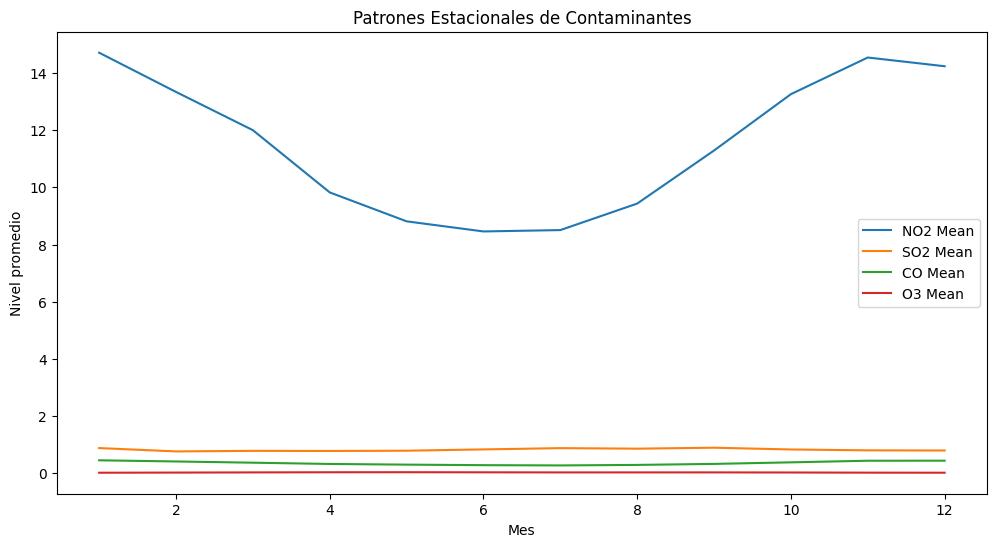

In [39]:
# Promedios mensuales por ciudad
promedios_mensuales = df_ca.groupby(['City', pd.Grouper(key='Date Local', freq='ME')])[contaminantes].mean()
print(promedios_mensuales)

# Top 5 ciudades por contaminante
for cont in contaminantes:
    print(f"\nTop 5 ciudades con mayor nivel de {cont}:")
    print(df_ca.groupby('City')[cont].mean().nlargest(5))

# Análisis estacional
df_ca['Month'] = df_ca['Date Local'].dt.month
patrones_estacionales = df_ca.groupby('Month')[contaminantes].mean()

# Visualización de patrones estacionales
plt.figure(figsize=(12, 6))
for cont in contaminantes:
    plt.plot(patrones_estacionales.index, patrones_estacionales[cont], label=cont)
plt.title('Patrones Estacionales de Contaminantes')
plt.xlabel('Mes')
plt.ylabel('Nivel promedio')
plt.legend()
plt.show()

4. Crea nuevas columnas derivadas:
   - Índice de calidad del aire simplificado
   - Clasificación por niveles de riesgo
   - Indicadores de cumplimiento de estándares EPA

In [30]:
# Calcular índice de calidad del aire simplificado
def calcular_indice_calidad(row):
    # Usando los valores AQI existentes
    aqi_values = [
        row['NO2 AQI'],
        row['SO2 AQI'],
        row['CO AQI'],
        row['O3 AQI']
    ]
    return np.mean([x for x in aqi_values if not np.isnan(x)])

df_ca['indice_calidad'] = df_ca.apply(calcular_indice_calidad, axis=1)

# Clasificación por niveles de riesgo
def clasificar_riesgo(indice):
    if indice <= 50: return 'Bueno'
    elif indice <= 100: return 'Moderado'
    elif indice <= 150: return 'Dañino para grupos sensibles'
    else: return 'Dañino'

df_ca['nivel_riesgo'] = df_ca['indice_calidad'].apply(clasificar_riesgo)

Para verlos de diferentes formas:

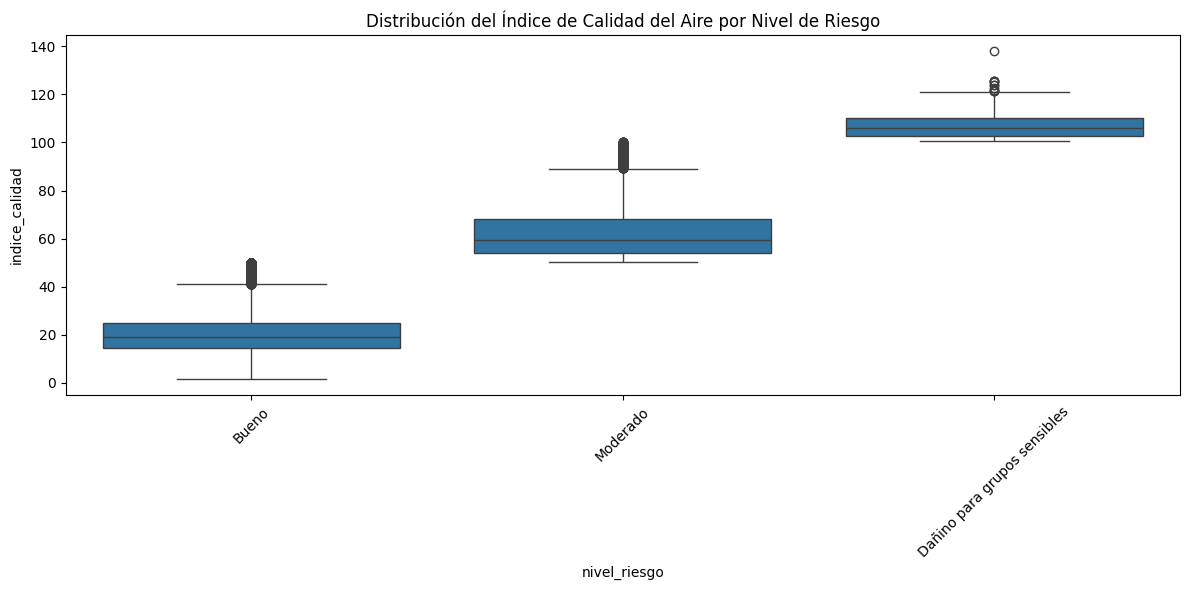

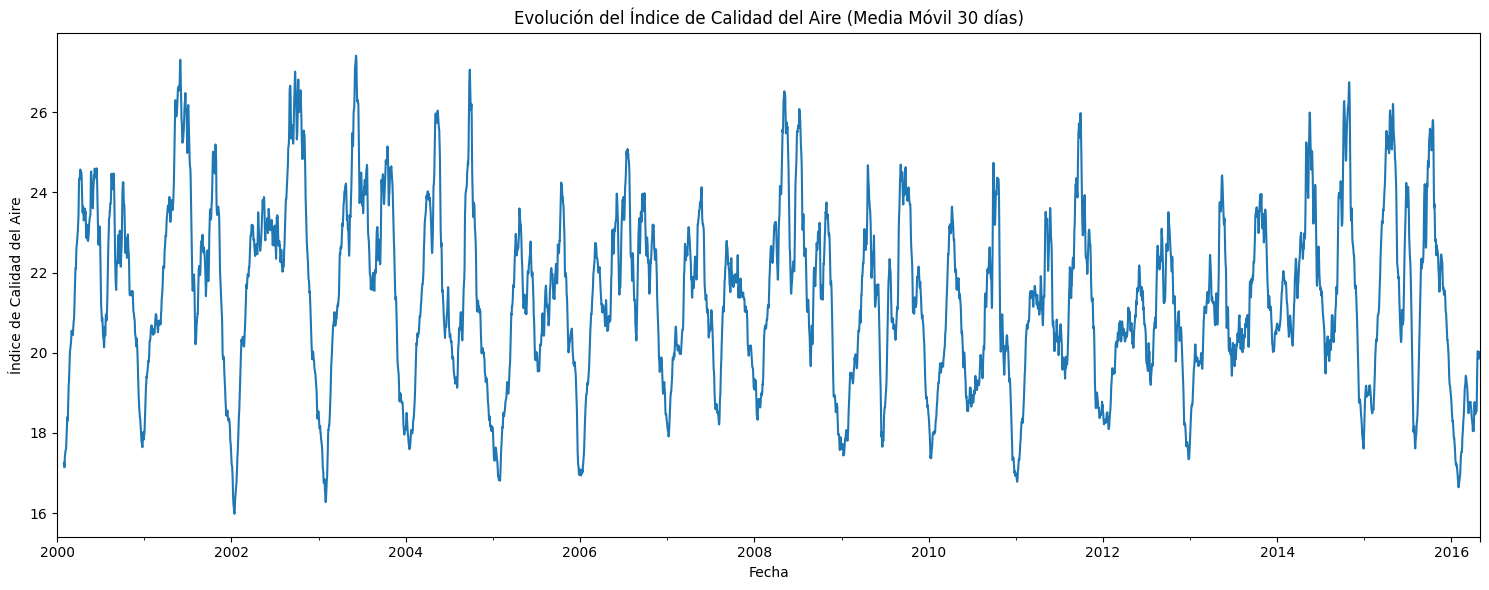

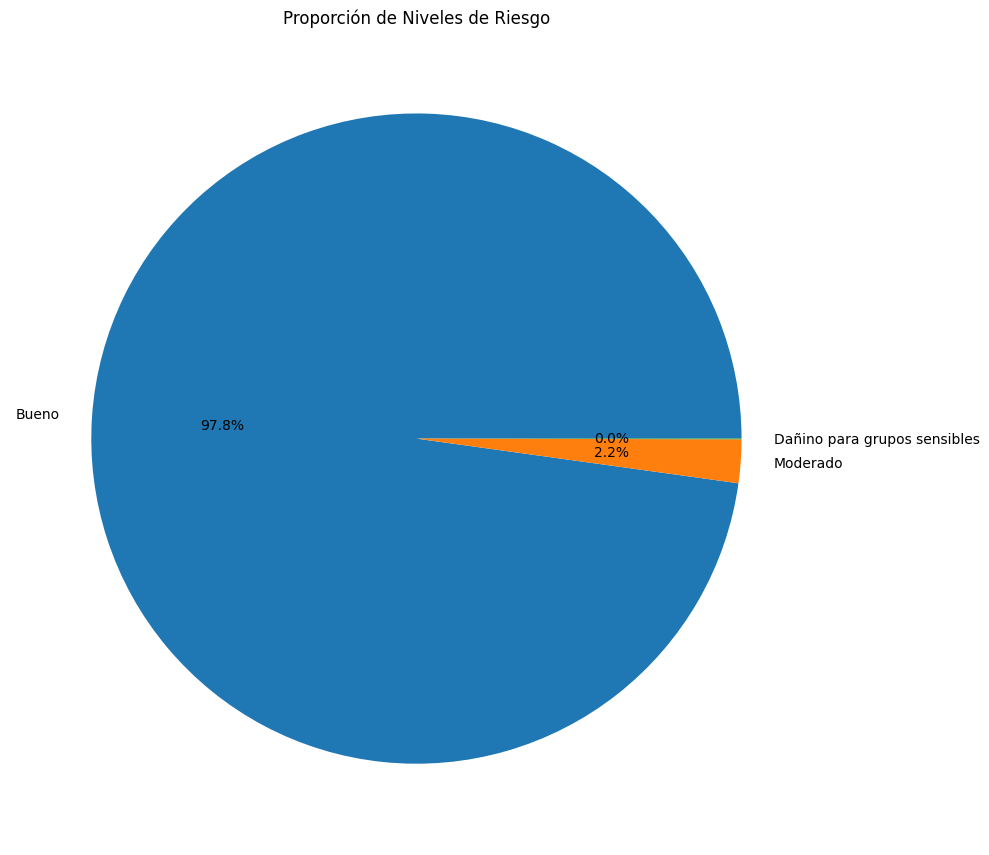

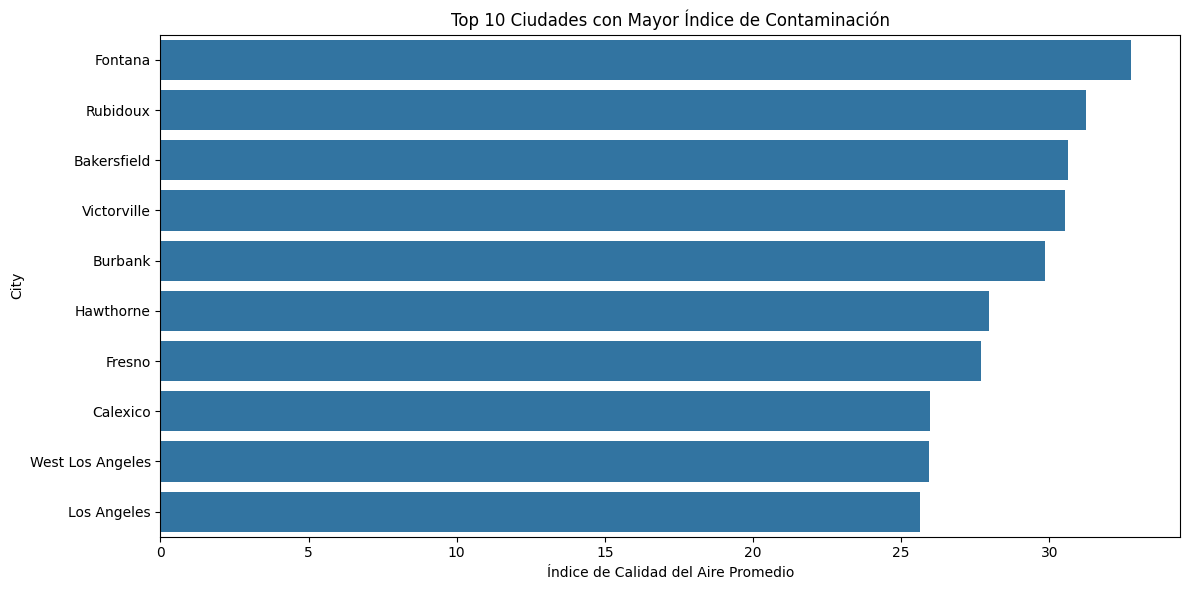

<Figure size 1200x600 with 0 Axes>

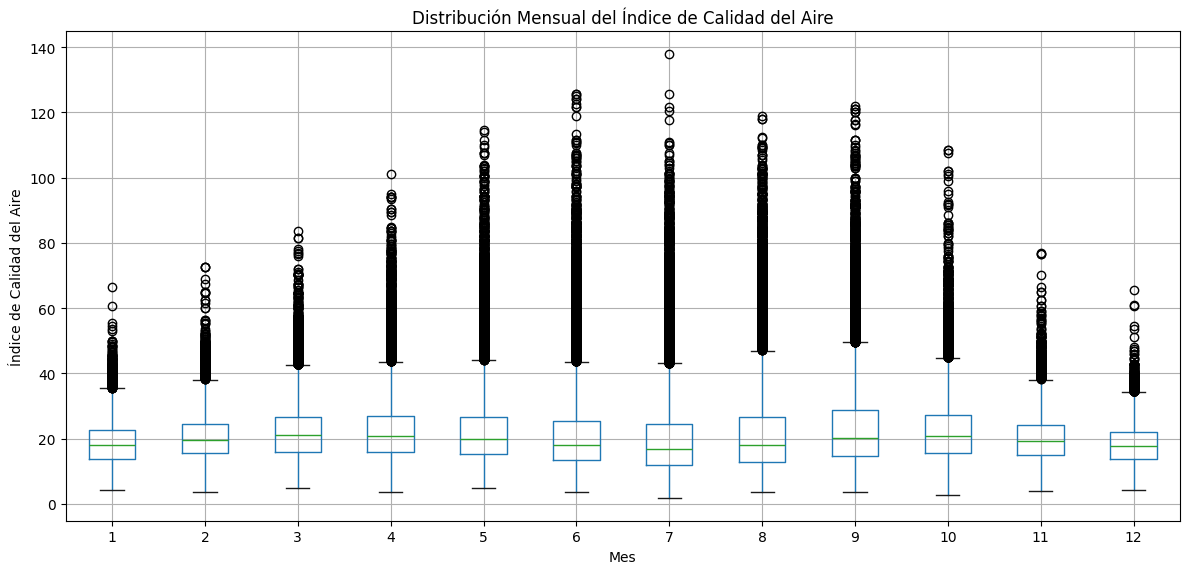

In [36]:
# Configuración de estilo
plt.style.use('default')

# 1. Distribución del índice de calidad por nivel de riesgo
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_ca, x='nivel_riesgo', y='indice_calidad')
plt.title('Distribución del Índice de Calidad del Aire por Nivel de Riesgo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Evolución temporal del índice de calidad
plt.figure(figsize=(15, 6))
df_ca.groupby('Date Local')['indice_calidad'].mean().rolling(window=30).mean().plot()
plt.title('Evolución del Índice de Calidad del Aire (Media Móvil 30 días)')
plt.xlabel('Fecha')
plt.ylabel('Índice de Calidad del Aire')
plt.tight_layout()
plt.show()

# 3. Proporción de niveles de riesgo
plt.figure(figsize=(10, 10))
df_ca['nivel_riesgo'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Niveles de Riesgo')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 4. Top 10 ciudades con peor calidad del aire
plt.figure(figsize=(12, 6))
top_10_ciudades = df_ca.groupby('City')['indice_calidad'].mean().nlargest(10)
sns.barplot(x=top_10_ciudades.values, y=top_10_ciudades.index)
plt.title('Top 10 Ciudades con Mayor Índice de Contaminación')
plt.xlabel('Índice de Calidad del Aire Promedio')
plt.tight_layout()
plt.show()

# 5. Distribución mensual del índice de calidad
plt.figure(figsize=(12, 6))
df_ca.boxplot(column='indice_calidad', by='Month', figsize=(12, 6))
plt.title('Distribución Mensual del Índice de Calidad del Aire')
plt.xlabel('Mes')
plt.ylabel('Índice de Calidad del Aire')
plt.suptitle('')  # Esto elimina el título automático adicional
plt.tight_layout()
plt.show()

5. Realiza análisis temporal:
   - Calcula tendencias anuales
   - Identifica días críticos (con valores extremos)
   - Genera medias móviles semanales y mensuales

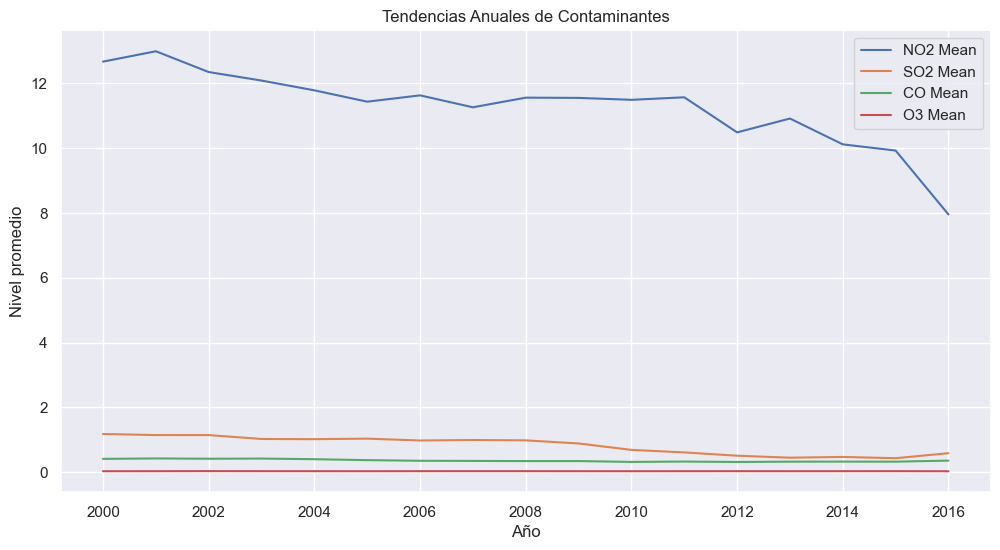

In [32]:
# Análisis temporal
df_ca['Year'] = df_ca['Date Local'].dt.year
tendencias_anuales = df_ca.groupby('Year')[contaminantes].mean()

# Visualización de tendencias anuales
plt.figure(figsize=(12, 6))
for cont in contaminantes:
    plt.plot(tendencias_anuales.index, tendencias_anuales[cont], label=cont)
plt.title('Tendencias Anuales de Contaminantes')
plt.xlabel('Año')
plt.ylabel('Nivel promedio')
plt.legend()
plt.show()

6. Exporta los resultados:
   - Guarda un resumen por ciudad en CSV
   - Crea un archivo con los días críticos identificados
   - Genera un reporte con las estadísticas principales

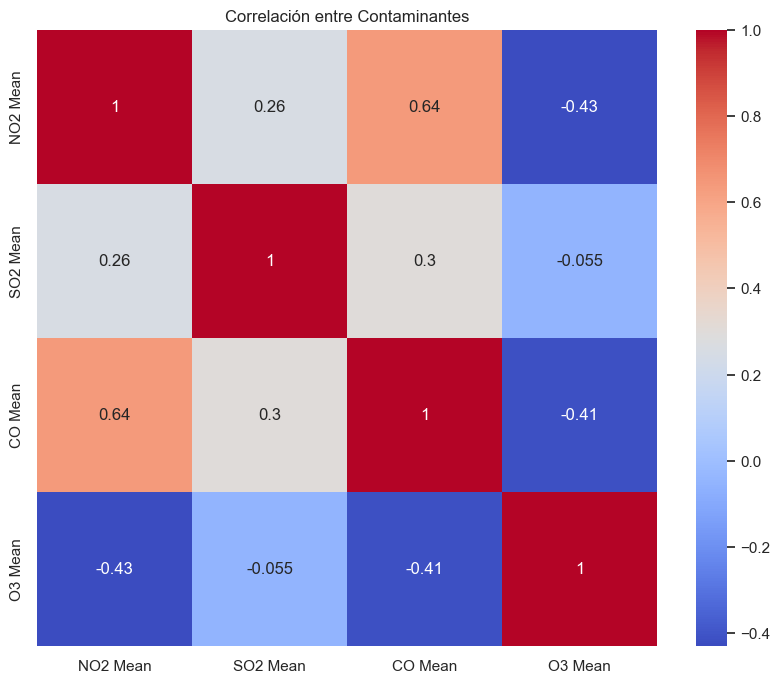

In [33]:
# Exportar resultados
resumen_ciudad = df_ca.groupby('City').agg({
    'NO2 Mean': 'mean',
    'SO2 Mean': 'mean',
    'CO Mean': 'mean',
    'O3 Mean': 'mean',
    'indice_calidad': 'mean'
}).round(2)

# Guardar resultados
resumen_ciudad.to_csv('resumen_por_ciudad.csv')

# Días críticos (usando el índice de calidad del aire)
dias_criticos = df_ca[df_ca['indice_calidad'] > df_ca['indice_calidad'].quantile(0.95)]
dias_criticos.to_csv('dias_criticos.csv')

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_ca[contaminantes].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre Contaminantes')
plt.show()